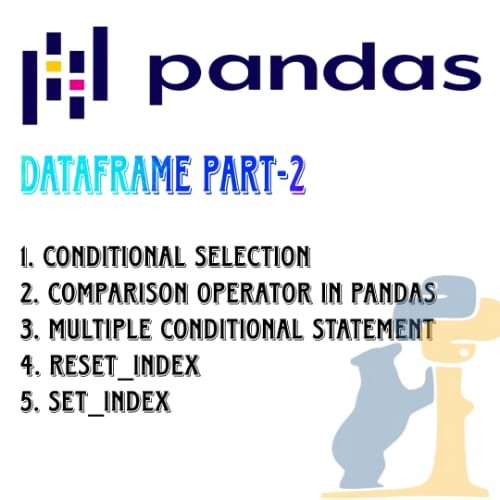

# Pandas DataFrame - Part 2

* Last time we left off how to create a basic data frame and grab information from that data

* Now we're going to look at conditional selection as well as some MultiIndex Part of the data Frame

In [1]:
# Importing the modules
import numpy as np
import pandas as pd

In [2]:
from numpy.random import randn

In [3]:
np.random.seed(10) # We create seed because we get the once defined random numbers again and again

In [4]:
# Creating a dataframe as we have made before for the DataFrame Part1
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

In [5]:
df

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


## Conditional Selection:
- A very important feature of PANDAS is the ability to perfrom Conditional Selection using the Brackett Notation.
- This is going to be very similar to NumPy for instance using the Comparison Operator for DataFrame.
- Such as asking where is the DataFrame greater than Zero

In [6]:
booldf = df > 0
booldf

,W,X,Y,Z
A,True,True,False,False
B,True,False,True,True
C,True,False,True,True
D,False,True,True,True
E,False,True,True,False


* Here we get the values true if the value if greater than zero and False if not greater than zero.

In [7]:
df[booldf] # Very important asked in many interview

,W,X,Y,Z
A,1.331587,0.715279,NaN,NaN
B,0.621336,NaN,0.265512,0.108549
C,0.004291,NaN,0.433026,1.203037
D,NaN,1.028274,0.228630,0.445138
E,NaN,0.135137,1.484537,NaN


In [8]:
# another way
df [ df > 0 ]

,W,X,Y,Z
A,1.331587,0.715279,NaN,NaN
B,0.621336,NaN,0.265512,0.108549
C,0.004291,NaN,0.433026,1.203037
D,NaN,1.028274,0.228630,0.445138
E,NaN,0.135137,1.484537,NaN


In [9]:
df

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


In [10]:
# Now Let's see only W column
df["W"] > 0

A     True
B     True
C     True
D    False
E    False
Name: W, dtype: bool

In [11]:
df["W"]

A    1.331587
B    0.621336
C    0.004291
D   -0.965066
E   -1.136602
Name: W, dtype: float64

In [12]:
# IF we want this in DataFrame , It's now in Pandas.Series

df[df["W"] > 0]

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037


* It will return the rows where the values W > 0
* Since we are passing in a Series we dont get the null Values anymore.
* We only get those Null Values when we are doing this sort of Condition on an entire DataFrame , When we are actually passing coditional based off the columns , we will get Series values.
* we will get the rows where the statement is True.
* This is the Sort of Conditional Selection We use Often In Projects.

#### Let's go in and see just a few more examples to really drive this point.

* **Let's say we want to grab all the rows in my data Frame where z is less than zero.**

In [13]:
#Let's see our dataframe:
df

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


In [14]:
# we want all the valus in the Z column where z < 0:
# let's before doing lets see the results 
# There are two values in z column where value is less than zero.
# SO we will get back the row C and E
# Let's see:-

df [ df["Z"] < 0 ]

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
E,-1.136602,0.135137,1.484537,-1.079805


Hurrah! we guessed it Right:

#### It will become difficult now pay attention

#### Now if we want the x column where W columns values are greater than ZERO:

In [15]:
df # THis is our dataFrame

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


In [16]:
# lets divide the question in two parts 
# first , We want X column
# Second from W > 0

# lets take the second part first:
df [ df['W'] > 0 ] # This has given us the rows where W values greater than zero


,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037


In [17]:
# lets put it in the object 
resultdf = df [ df["W"]>0 ]
resultdf

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037


In [18]:
# As its the dataFrame we can select any column as we have dont previously in Selection of columns:
resultdf["X"]

A    0.715279
B   -0.720086
C   -0.174600
Name: X, dtype: float64

* So Guy's we get the out answer where we want column X where w values are greater than zero
* But don't you think It's a long code
* and Python is a simple language as we have known it
* Hence , There is another way easiest and simple


In [19]:
df [ df["W"] > 0 ]["X"]

A    0.715279
B   -0.720086
C   -0.174600
Name: X, dtype: float64

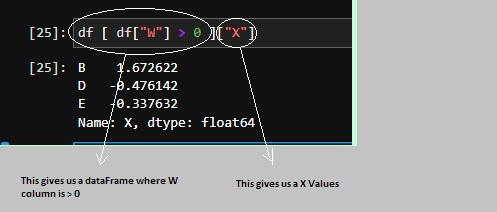

In [21]:
# WE can pass in Multiple columns also
df [ df [ "W" ] > 0 ] [["X","Y","W"]]

,X,Y,W
A,0.715279,-1.545400,1.331587
B,-0.720086,0.265512,0.621336
C,-0.174600,0.433026,0.004291


* But Remember here we use Two brackets instead of one as it as DataFrame Now Not a Series.

In [22]:
boolser = df ["W"] > 0
result = df[boolser]
mycols = ["Y","X","W"]
result[mycols]

,Y,X,W
A,-1.545400,0.715279,1.331587
B,0.265512,-0.720086,0.621336
C,0.433026,-0.174600,0.004291


In [23]:
df [ df [ "W" ] > 0 ] [["X","Y","W"]]

,X,Y,W
A,0.715279,-1.545400,1.331587
B,-0.720086,0.265512,0.621336
C,-0.174600,0.433026,0.004291


#### We have done Multiple lines of Code in a single line
it will saves a lot of time in future

## The Concepts of Using Multiple Conditions as two or More Conditions:

In [24]:
# Till Now we get confortable doing this
df [ df["W"] > 0]

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037


#### Now we want to know Where W > 0 and Y > 1 

In [25]:
df [ (df["W"] > 0) and (df["Y"]>1)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

* This is Most of the Mistakes begineers Commit to put this and you will get a mistale that says something about series

* Here what if mistake is ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()

* What this means is : Normal and operator can perfrom a series of Boolean Operations;

- An AND operator acoount single boolean Values or Operation at a time

In [26]:
True and False

False

In [27]:
df['W'] > 0 

A     True
B     True
C     True
D    False
E    False
Name: W, dtype: bool

* That means when you pass a series of Boolean values such as this 
* Here the And Operators get Confused
* It can only deals with these single instances of boolean values which i why when we are working with Pandas we should use ampersand (&) for AND ,  Pipe (|) for OR.
* SO, in Pandas we should Use for AND(&) and OR(|)

In [28]:
df [ (df["W"] > 0) & (df["Y"]>1)]

,W,X,Y,Z


## Resetting the Index or Setting it for Something Else:

In [29]:
# LEt's take the look at the dataFrame.
df

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


*  *We have row index from A to E and Clumns index from W to Z*
* Now we should reset to the default index that means 
    - 1 to Nth rows.
    - 1 to Nth Columns.

In [30]:
# Here, We are going to Use the Special Keyword
# And Remember to write Open and Close Parenthesis.

df.reset_index()

,index,W,X,Y,Z
0,A,1.331587,0.715279,-1.545400,-0.008384
1,B,0.621336,-0.720086,0.265512,0.108549
2,C,0.004291,-0.174600,0.433026,1.203037
3,D,-0.965066,1.028274,0.228630,0.445138
4,E,-1.136602,0.135137,1.484537,-1.079805


* We get our before index as column in a df 
* And we reseted the index as Numerical 
* If we dont want to Index Column 
* We can drop using the df.drop("index",axis=1,inplace=True)

* *If you are following me. You know it very well.*

In [31]:
df

,W,X,Y,Z
A,1.331587,0.715279,-1.545400,-0.008384
B,0.621336,-0.720086,0.265512,0.108549
C,0.004291,-0.174600,0.433026,1.203037
D,-0.965066,1.028274,0.228630,0.445138
E,-1.136602,0.135137,1.484537,-1.079805


hey, But why we are still not getting the Numercial Index:

#### IF we want it to actually occur there are two ways 
* 1st -> df = df.reset_index()
* 2nd -> df.reset_index(inplace=True)

In [32]:
df.reset_index(inplace=True)

In [33]:
df

,index,W,X,Y,Z
0,A,1.331587,0.715279,-1.545400,-0.008384
1,B,0.621336,-0.720086,0.265512,0.108549
2,C,0.004291,-0.174600,0.433026,1.203037
3,D,-0.965066,1.028274,0.228630,0.445138
4,E,-1.136602,0.135137,1.484537,-1.079805


Either both ways are Correct! Its your call Now.

In [34]:
# Hence we want our dataFrame back i will have to make it again
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

In [35]:
df

,W,X,Y,Z
A,-1.977728,-1.743372,0.266070,2.384967
B,1.123691,1.672622,0.099149,1.397996
C,-0.271248,0.613204,-0.267317,-0.549309
D,0.132708,-0.476142,1.308473,0.195013
E,0.400210,-0.337632,1.256472,-0.731970


### Lets create a user defined index for us:

In [36]:
newind = "CA NY WY OR CO".split()
newind

['CA', 'NY', 'WY', 'OR', 'CO']

In [37]:
df["states"] = newind # as rowno mathced as 5 dataframe considered it.

In [38]:
df

,W,X,Y,Z,states
A,-1.977728,-1.743372,0.266070,2.384967,CA
B,1.123691,1.672622,0.099149,1.397996,NY
C,-0.271248,0.613204,-0.267317,-0.549309,WY
D,0.132708,-0.476142,1.308473,0.195013,OR
E,0.400210,-0.337632,1.256472,-0.731970,CO


* Now we have the column States which we want a Index for the DataFrame
* Instead of Using the keyword **RESET_INDEX**  we will use now **SET_INDEX**.

In [39]:
#df.set_index(column name which has to be appeared as index)

df.set_index("states",inplace=True)
df

,W,X,Y,Z
states,,,,
CA,-1.977728,-1.743372,0.266070,2.384967
NY,1.123691,1.672622,0.099149,1.397996
WY,-0.271248,0.613204,-0.267317,-0.549309
OR,0.132708,-0.476142,1.308473,0.195013
CO,0.400210,-0.337632,1.256472,-0.731970


* Keep in mind unless you retain this information of the index so overwrite the old index and you won't be able to retain this informationa as a new column.
* so that's set_index V/S reset_index

#### Quick Review: 
Let me just go and just do a quick review of what we just covered before we head up to **Pandas DataFrame Part-3**

* We have Learned about Conditional Selection which is very similar to NumPy Operations.

* We Basically get a dataframe of boolean values and if you pass in a whole data , we get the values where it's True and we get NaN values where it is False

* If we pass in a Series of Boolean Values, such as a Column as a Comparison Operator [ >,<,== ] , We will be getting the rows of the dataFrame where Series happened to be true and you could break this down to Multiple steps if you wanted to 

* This cell if very important to remember:
    - df[df["W"]>0][["X","Y","Z"]]
    - If you understand is you automatically understand the Conditional Statement Preoperly.
    
* IF you want to do Multiple Conditional you should use Ampersand (&) and Pipe (|) , YOu could now use and, or built in function because of the ambihious Values in a Truth Series and remember to use Parenthesis to Separte each conditional statement 

* Reset_Index is just going to reset your index to numerical inde and take your old index as a new Column

* You can set new index by giving a proper index in a list and using a KeyWord df.set_index()

* These both methods are not in place by default, Make sure to mention inplace = True if you want to replace it to permanent 

* Thats it Guys....
* We will meet again in Pandas DataFrame Part-3

### Keep Learning Keep Growing
#### Raj Kulhade